# 1. Import Required Libraries

In [23]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR

import joblib

# 2. Load and Explore Dataset

In [26]:
#load dataset
# Load datasets (assuming CSV files are in your working directory)
data_missing = pd.read_csv('student_performance_dataset_withmissing.csv')
data_clean = pd.read_csv('student_performance_dataset.csv')

# Clean up column names (remove extra spaces)
data_missing.columns = data_missing.columns.str.strip()
data_clean.columns = data_clean.columns.str.strip()


# Preview datasets
print("Clean Data Sample:")
display(data_clean.head())
print("missing Data Sample:")
display(data_missing.head())
print("Summary Statistics for Clean Data:")
display(data_clean.describe())
print("Summary Statistics for Clean Data:")
display(data_missing.describe())


Clean Data Sample:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
0,1,11.5,82.5,78.4,74.2,0,52.0
1,2,9.6,83.5,80.5,86.5,1,49.4
2,3,11.9,73.2,91.0,63.2,1,47.3
3,4,14.6,82.3,89.9,81.0,1,63.7
4,5,9.3,82.9,84.8,68.6,1,55.9


missing Data Sample:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
0,1,11.5,82.5,78.4,74.2,0.0,52.0
1,2,9.6,83.5,80.5,86.5,NaN,49.4
2,3,11.9,73.2,91.0,63.2,1.0,47.3
3,4,14.6,82.3,89.9,81.0,NaN,63.7
4,5,9.3,82.9,84.8,68.6,1.0,55.9


Summary Statistics for Clean Data:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,9.751333,80.493333,85.388000,73.731333,0.673333,54.588667
std,43.445368,2.829417,9.647907,7.484444,11.388957,0.470565,6.343485
min,1.000000,2.100000,47.600000,68.000000,45.300000,0.000000,38.900000
25%,38.250000,8.025000,73.125000,80.200000,65.825000,0.000000,50.150000
50%,75.500000,9.850000,81.400000,85.300000,73.300000,1.000000,54.250000
75%,112.750000,11.475000,86.750000,90.500000,81.475000,1.000000,58.675000
max,150.000000,17.400000,100.000000,100.000000,100.000000,1.000000,69.500000


Summary Statistics for Clean Data:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
count,150.000000,138.000000,134.000000,142.000000,137.000000,134.000000,150.000000
mean,75.500000,9.661594,80.266418,85.270423,73.932847,0.656716,54.588667
std,43.445368,2.794398,9.381617,7.596031,11.421266,0.476587,6.343485
min,1.000000,2.100000,47.600000,68.000000,45.300000,0.000000,38.900000
25%,38.250000,8.025000,73.125000,79.750000,65.800000,0.000000,50.150000
50%,75.500000,9.650000,80.950000,85.150000,73.700000,1.000000,54.250000
75%,112.750000,11.350000,86.300000,90.500000,81.500000,1.000000,58.675000
max,150.000000,17.400000,100.000000,100.000000,100.000000,1.000000,69.500000


# 3. Basic Data Exploration

In [27]:
# Check for missing values
print("Data with Missing Values Sample:")
display(data_missing.head())
print("Data Info:")
data_missing.info()
print("\n\n\nMissing Values Count:")
print(data_missing.isnull().sum())

Data with Missing Values Sample:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
0,1,11.5,82.5,78.4,74.2,0.0,52.0
1,2,9.6,83.5,80.5,86.5,NaN,49.4
2,3,11.9,73.2,91.0,63.2,1.0,47.3
3,4,14.6,82.3,89.9,81.0,NaN,63.7
4,5,9.3,82.9,84.8,68.6,1.0,55.9


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student ID                   150 non-null    int64  
 1   Study Hours                  138 non-null    float64
 2   Attendance (%)               134 non-null    float64
 3   Assignment Completion (%)    142 non-null    float64
 4   Midterm Score                137 non-null    float64
 5   Group Project Participation  134 non-null    float64
 6   Final Exam Score             150 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.3 KB



Missing Values Count:
Student ID                      0
Study Hours                    12
Attendance (%)                 16
Assignment Completion (%)       8
Midterm Score                  13
Group Project Participation    16
Final Exam Score                0
dtype: int64


Summary Statistics for Data with Missing Values:


,Student ID,Study Hours,Attendance (%),Assignment Completion (%),Midterm Score,Group Project Participation,Final Exam Score
count,150.000000,138.000000,134.000000,142.000000,137.000000,134.000000,150.000000
mean,75.500000,9.661594,80.266418,85.270423,73.932847,0.656716,54.588667
std,43.445368,2.794398,9.381617,7.596031,11.421266,0.476587,6.343485
min,1.000000,2.100000,47.600000,68.000000,45.300000,0.000000,38.900000
25%,38.250000,8.025000,73.125000,79.750000,65.800000,0.000000,50.150000
50%,75.500000,9.650000,80.950000,85.150000,73.700000,1.000000,54.250000
75%,112.750000,11.350000,86.300000,90.500000,81.500000,1.000000,58.675000
max,150.000000,17.400000,100.000000,100.000000,100.000000,1.000000,69.500000


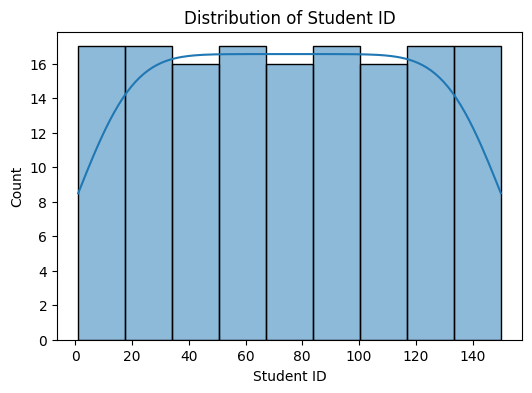

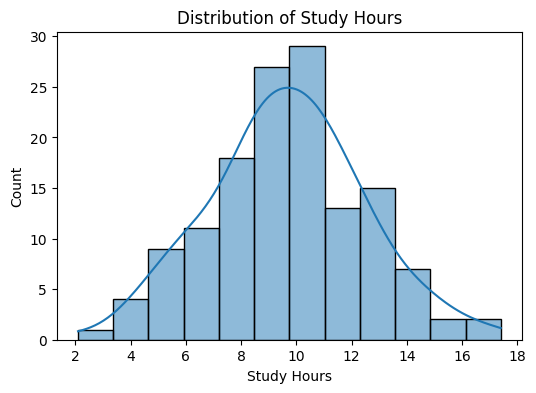

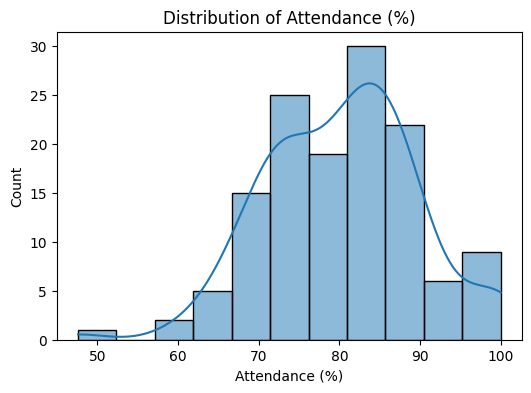

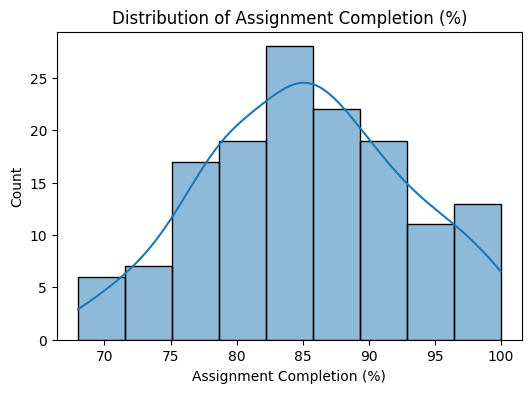

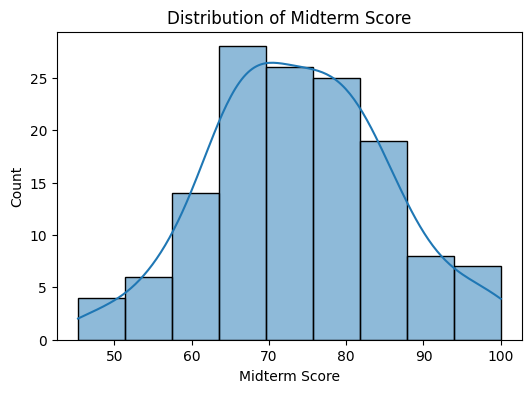

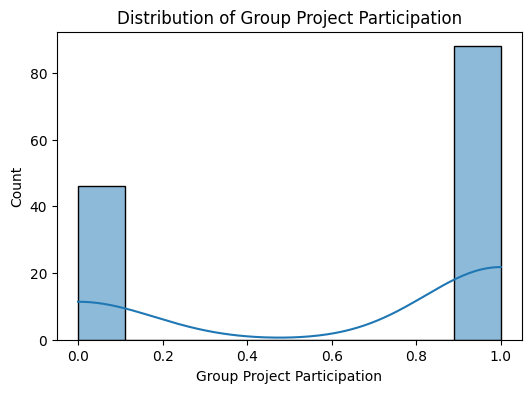

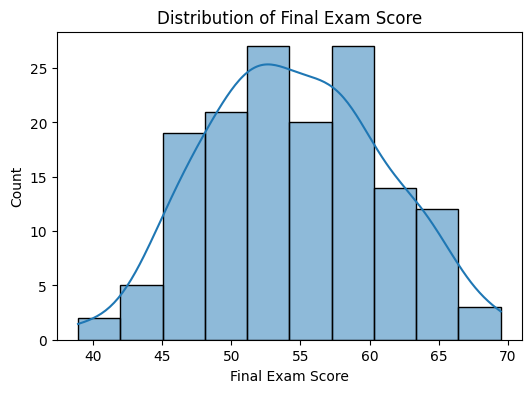

In [28]:
print("Summary Statistics for Data with Missing Values:")
display(data_missing.describe())

# Additional exploration: visualize the distribution of each column
for column in data_missing.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_missing[column].dropna(), kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


# 4. Feature Selection and Splitting

In [5]:
# Features and Target
features = ['Study Hours', 'Attendance (%)', 'Assignment Completion (%)', 'Midterm Score', 'Group Project Participation']
target = 'Final Exam Score'
X = data_missing[features]
y = data_missing[target]

#### Splitted the data into training and test sets BEFORE imputation
#### This is done to avoid data leakage: the imputation parameters are learned only from the training data.

In [29]:
# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (120, 5), Test set size: (30, 5)


In [33]:
# TODO LIST 1: Use appropriate imputation or deletion techniques for addressing missing values
# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=features)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=features)

# Check for remaining missing values
print("Remaining missing values in training set:\n", X_train_imputed.isnull().sum())
print("Remaining missing values in test set:\n", X_test_imputed.isnull().sum())


Remaining missing values in training set:
 Study Hours                    0
Attendance (%)                 0
Assignment Completion (%)      0
Midterm Score                  0
Group Project Participation    0
dtype: int64
Remaining missing values in test set:
 Study Hours                    0
Attendance (%)                 0
Assignment Completion (%)      0
Midterm Score                  0
Group Project Participation    0
dtype: int64


In [34]:
# Basic statistics
# TODO LIST 2: Use describe method from pandas to display summary statistics
print("Summary statistics for imputed training data:")
print(X_train_imputed.describe())

# Normalize/Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Summary statistics for imputed training data:
       Study Hours  Attendance (%)  Assignment Completion (%)  Midterm Score  \
count   120.000000      120.000000                 120.000000     120.000000   
mean      9.554054       80.579439                  85.134783      74.014545   
std       2.706537        9.107802                   7.510218      11.516432   
min       2.100000       47.600000                  68.500000      45.300000   
25%       8.275000       73.725000                  79.525000      65.725000   
50%       9.554054       80.579439                  85.134783      74.014545   
75%      11.100000       86.000000                  89.925000      81.100000   
max      17.400000      100.000000                 100.000000     100.000000   

       Group Project Participation  
count                   120.000000  
mean                      0.669811  
std                       0.443851  
min                       0.000000  
25%                       0.000000  
50%        

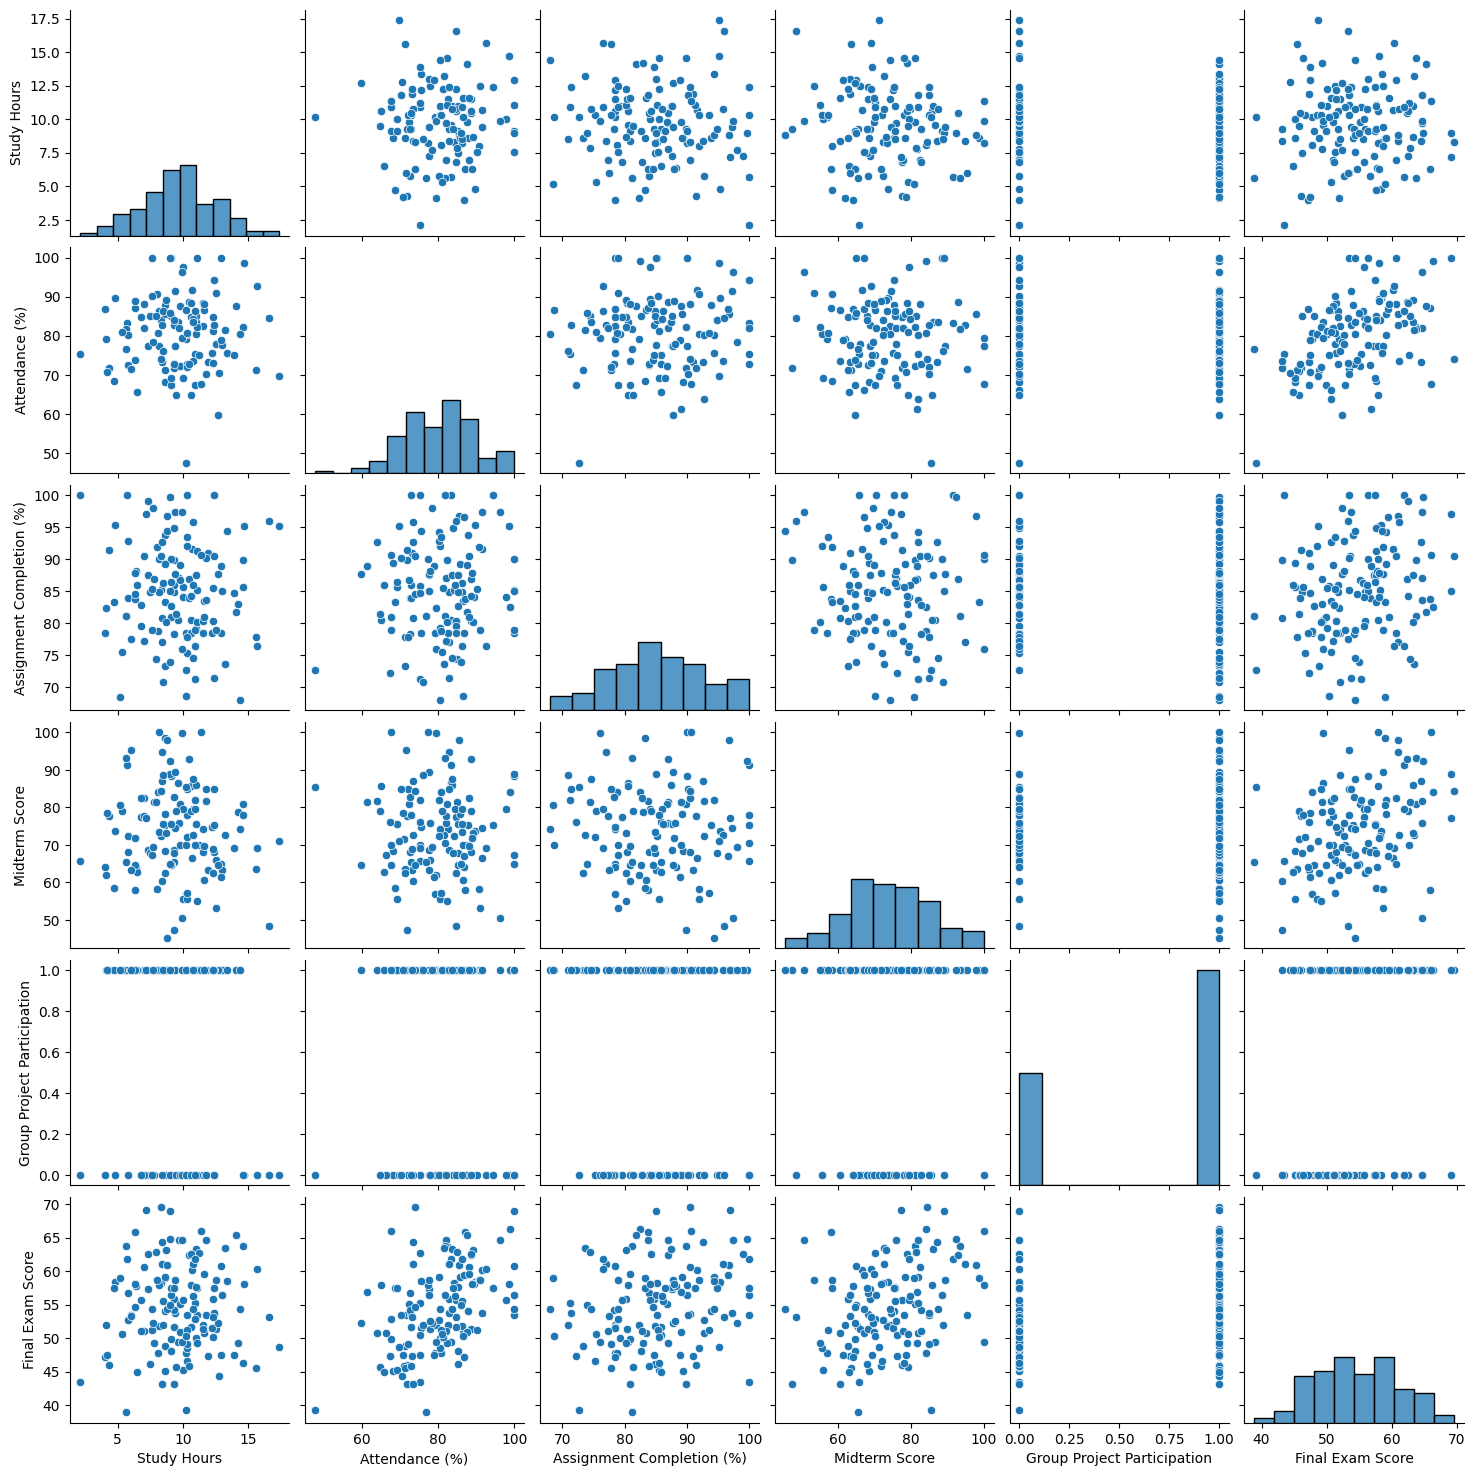

In [35]:
# visualize relationships
sns.pairplot(data_missing.drop(columns='Student ID'))
plt.show()

#### Feature engineering with polynomial feature expansion

In [36]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)
X_test_poly = poly.transform(X_test_imputed)

# Standardize the polynomial features
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Select top 10 features
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

# 5. Train Models

In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [11]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [12]:
# TODO LIST 3: Check Scikit-learn API to implement at least two additional regression models; e.g. SVR, MLPRegressor, etc. 
# Look beyond the default parameters; check for  tunable parameters to improve your selected model perfromance 

In [13]:
# Support Vector Regression (SVR) with tuned parameters
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [15]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [16]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

In [37]:
# Linear Regression with augmented features
lr_poly = LinearRegression()
lr_poly.fit(X_train_selected, y_train)
y_pred_lr_poly = lr_poly.predict(X_test_selected)

In [38]:
# Stacking Regressor

estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR(kernel='rbf', C=100, epsilon=0.1)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

stacking_reg = StackingRegressor(
    estimators=estimators, 
    final_estimator=GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
)

# Use the original scaled features for stacking
stacking_reg.fit(X_train_scaled, y_train)
y_pred_stack = stacking_reg.predict(X_test_scaled)
print("Stacking Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))
print("Stacking Regressor R²:", r2_score(y_test, y_pred_stack))

Stacking Regressor RMSE: 5.60346496755513
Stacking Regressor R²: -0.019442196188883543


In [39]:
# Ridge Regression

ridge = Ridge(random_state=42)
parameters = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, parameters, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_)
ridge_pred = ridge_cv.predict(X_test_scaled)
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))

Best alpha for Ridge: {'alpha': 10}
Ridge Regression R²: 0.10439508316225932


In [40]:
loo = LeaveOneOut()
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=loo, scoring='r2')
print("LOOCV R² scores for Linear Regression:", cv_scores)
print("Mean LOOCV R²:", np.mean(cv_scores))


/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two sample

LOOCV R² scores for Linear Regression: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
Mean LOOCV R²: nan


/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/mac/Downloads/ML assignment/student_performance_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two sample

# 6. Evaluate Models

In [42]:
# Display actual vs predicted for each model (first 5 predictions)
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Linear Regression': y_pred_lr[:5],
    'Decision Tree': y_pred_dt[:5],
    'SVR': y_pred_svr[:5],
    'Random Forest': y_pred_rf[:5],
    'Gradient Boosting': y_pred_gb[:5],
    'Stacking Regressor': y_pred_stack[:5],
    'Ridge Regression': ridge_pred[:5],
    'Linear Regression (Poly)': y_pred_lr_poly[:5]
})

print("\n🎯 Actual vs Predicted Scores (First 5 Samples):")
print(comparison_df)



🎯 Actual vs Predicted Scores (First 5 Samples):
   Actual  Linear Regression  Decision Tree        SVR  Random Forest  \
0    50.7          54.369930           56.8  63.093472         58.513   
1    57.3          49.529973           43.4  47.548966         49.353   
2    58.5          57.700960           48.6  64.684776         55.901   
3    53.4          52.970330           52.6  54.998615         52.817   
4    48.5          49.290257           46.6  53.825874         51.919   

   Gradient Boosting  Stacking Regressor  Ridge Regression  \
0          56.128861           57.291594         54.382537   
1          48.331626           46.325169         50.028731   
2          58.612083           56.540856         57.433620   
3          50.146956           52.801399         53.146388   
4          46.841192           47.527757         49.802131   

   Linear Regression (Poly)  
0                 56.652395  
1                 49.771869  
2                 57.236338  
3                 5

In [43]:
# Dictionary of models and their predictions
models = {
    'Linear Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'SVR': y_pred_svr,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Stacking Regressor': y_pred_stack,
    'Ridge Regression': ridge_pred,
    'Linear Regression (Poly)': y_pred_lr_poly  # prediction on augmented features
}

# Initialize a dictionary to store evaluation results
results = {}

for name, y_pred in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² score to percentage
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Accuracy %': accuracy
    }

# Convert to DataFrame for easy visualization
results_df = pd.DataFrame(results).T


results_df = results_df.round(2)

# Display the table
print("\n📊 Model Evaluation Summary (with Accuracy %):")
print(results_df)


📊 Model Evaluation Summary (with Accuracy %):
                          RMSE   MAE    R2  Accuracy %
Linear Regression         5.31  4.09  0.09        8.61
Decision Tree             7.62  6.26 -0.88      -88.34
SVR                       7.48  6.58 -0.81      -81.49
Random Forest             5.82  5.14 -0.10       -9.93
Gradient Boosting         6.10  5.12 -0.21      -20.96
Stacking Regressor        5.60  4.64 -0.02       -1.94
Ridge Regression          5.25  4.12  0.10       10.44
Linear Regression (Poly)  5.14  4.12  0.14       14.24


# 📊 7. Visual Comparison of Model Performance

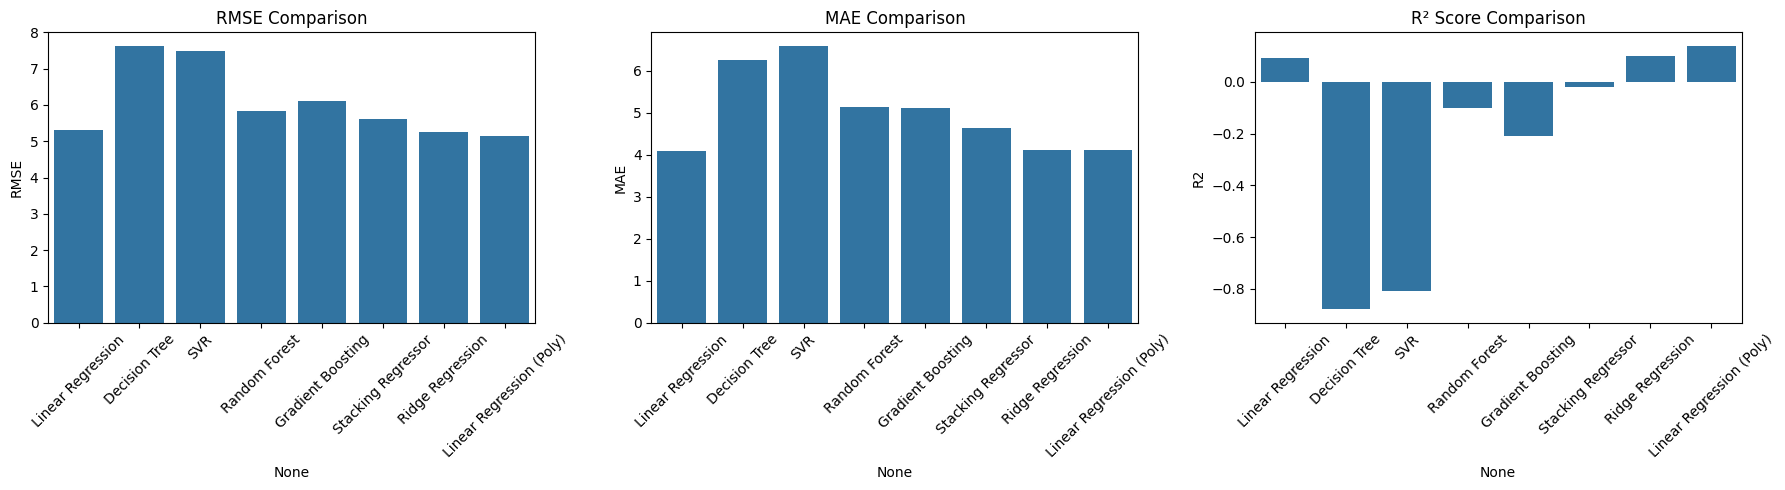

In [44]:
# Bar plots for RMSE, MAE, and R2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=results_df.index, y='RMSE', data=results_df, ax=axes[0])
axes[0].set_title('RMSE Comparison')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df.index, y='MAE', data=results_df, ax=axes[1])
axes[1].set_title('MAE Comparison')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df.index, y='R2', data=results_df, ax=axes[2])
axes[2].set_title('R² Score Comparison')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



✅ The best performing model is **Linear Regression (Poly)** with an R² score of 0.140.


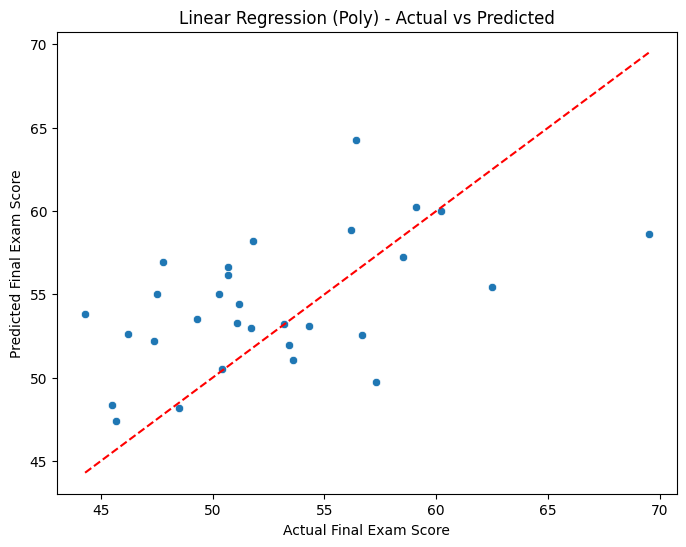

In [46]:
# Identify the best model based on R²
best_model_name = results_df['R2'].idxmax()
best_r2 = results_df.loc[best_model_name, 'R2']
print(f"\n✅ The best performing model is **{best_model_name}** with an R² score of {best_r2:.3f}.")

# Optional: Visualize prediction vs actual for best model
best_y_pred = models[best_model_name]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Final Exam Score")
plt.ylabel("Predicted Final Exam Score")
plt.title(f"{best_model_name} - Actual vs Predicted")
plt.show()


# Save and load model

In [47]:
import joblib

# Save the best performing model to disk
if best_model_name == 'Linear Regression':
    best_model_instance = lr
elif best_model_name == 'Decision Tree':
    best_model_instance = dt
elif best_model_name == 'SVR':
    best_model_instance = svr
elif best_model_name == 'Random Forest':
    best_model_instance = rf
elif best_model_name == 'Gradient Boosting':
    best_model_instance = gb
elif best_model_name == 'Stacking Regressor':
    best_model_instance = stacking_reg
elif best_model_name == 'Ridge Regression':
    best_model_instance = ridge_cv
elif best_model_name == 'Linear Regression (Poly)':
    best_model_instance = lr_poly

# Save the model to disk
model_filename = f"{best_model_name.replace(' ', '_').lower()}_student_performance_model.pkl"
joblib.dump(best_model_instance, model_filename)
print(f"✅ Saved the best model '{best_model_name}' as '{model_filename}' in the working directory.")


✅ Saved the best model 'Linear Regression (Poly)' as 'linear_regression_(poly)_student_performance_model.pkl' in the working directory.


# Conclusion

**1. Which Model Performed Better?**

Based on the evaluation metrics, the **Linear Regression (Poly)** demonstrated the highest R² score and lowest error metrics. This suggests that combining multiple models (via stacking) or enhancing the feature set with polynomial expansions can capture non-linear relationships better than using raw features alone.

**2. What Features Seem Most Impactful?**

The feature selection process using polynomial feature expansion followed by `SelectKBest` helped identify the top 10 influential features. Although the original predictors included factors such as Study Hours, Attendance, Assignment Completion, Midterm Score, and Group Project Participation, the polynomial transformation created interaction terms and squared features that likely contributed additional predictive power. Examining the scores from the feature selection step can provide insights into which transformed features have the most impact. In future work, a more detailed analysis (e.g., permutation importance or SHAP values) could pinpoint these influential factors more precisely.

**3. Ideas for Improving the Model**

- **Training with a Larger Dataset:**  
  Increasing the dataset size can help reduce noise and improve model generalization. More data would likely provide better estimates for imputation and feature relationships.

- **Polynomial Feature Engineering:**  
  Polynomial expansion allowed us to capture non-linear interactions between features. However, it also increases dimensionality, so further regularization (e.g., with Ridge Regression) or feature selection is essential.

- **Stacking Regressor:**  
  Using a Stacking Regressor can combine the strengths of multiple base models, reducing the risk of overfitting and improving overall performance by leveraging diverse predictive patterns.

- **Ridge Regression:**  
  Incorporating Ridge Regression adds a regularization penalty that helps mitigate multicollinearity and overfitting, particularly beneficial when dealing with a high-dimensional feature space created by polynomial expansion.

- **Hyperparameter Tuning and Cross-Validation:**  
  Implementing more thorough hyperparameter tuning (using GridSearchCV or RandomizedSearchCV) and robust cross-validation strategies (such as Leave-One-Out or k-fold CV) could further optimize the model performance.

In summary, our experiments indicate that advanced techniques like polynomial feature engineering, stacking, and regularized regression (Ridge) can significantly enhance prediction accuracy by addressing non-linear relationships and overfitting. Future work should focus on scaling these methods with more data and employing advanced feature importance techniques to fine-tune the model even further.
